SUMBER : https://www.kaggle.com/hendratno/cause-of-death-in-indonesia

## import library

In [ ]:
# untuk menyediakan puluhan fungsi untuk berinteraksi dengan sistem operasi
import os
# untuk Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data
import pandas as pd
# Untuk Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik
import matplotlib.pyplot as plt

import warnings

In [ ]:
# untuk perpustakaan statistik yang dirancang untuk mengisi kekosongan dalam kemampuan analisis
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 37.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Untuk menemukan urutan optimal dan urutan musiman yang optimal, berdasarkan kriteria yang ditentukan seperti AIC, BIC, dll.
from pmdarima import auto_arima
#ARIMA yang dapat menghapus komponen tren untuk memprediksi nilai masa depan secara akurat.
from statsmodels.tsa.arima.model import ARIMA
#Sklearn.metricsmemiliki mean_squared_errorfungsi. RMSE hanyalah akar kuadrat dari apa pun yang dikembalikan.
from sklearn.metrics import mean_squared_error
# mengembalikan akar kuadrat dari jumlah x
from math import sqrt

In [ ]:
# import Dataset (uas) yang akan digunakan
uas = pd.read_csv('/content/Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv')

In [ ]:
# Melihat isi dari dataset (uas)
uas = pd.read_csv('/content/Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv', index_col='Year', parse_dates=True)
print('Baris dan Kolom Data', uas.shape)
uas

Baris dan Kolom Data (648, 7)


,Cause,Type,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
Year,,,,,,,
2004-01-01,Tsunami Aceh (Meninggal),Bencana Alam,1,129171,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
2021-01-01,COVID-19,Bencana Non Alam dan Penyakit,1,121956,COVID19.go.id,NaN,NaN
2004-01-01,Tsunami Aceh (Hilang),Bencana Alam,1,37527,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
2010-01-01,Kecelakaan Lalu Lintas,Bencana Non Alam dan Penyakit,1,29952,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.41,https://pusdatin.kemkes.go.id/download.php?fil...
2008-01-01,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,1,23163,Profil Kesehatan Indonesia Tahun 2009,31,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...
2020-01-01,Tsunami,Bencana Alam,1,0,Profil Kesehatan Indonesia Tahun 2020,190,https://pusdatin.kemkes.go.id/download.php?fil...
2016-01-01,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
2017-01-01,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...


## analisa attribute dataset

In [ ]:
# Menggunakan attribute yang digunakan
uas = uas.loc[:, uas.columns.intersection(['Year', 'Data Redundancy', 'Total Deaths'])]

# Menjumlahkan semua tahun yang sama 
uas = uas.groupby(['Year']).sum()

# Melihat isi data yang double
print('Baris dan Kolom Data', uas.shape)
uas

Baris dan Kolom Data (22, 1)


,Total Deaths
Year,
2000-01-01,339
2001-01-01,324
2002-01-01,435
2003-01-01,633
2004-01-01,220744
2005-01-01,123036
2006-01-01,127065
2007-01-01,89275
2008-01-01,106298


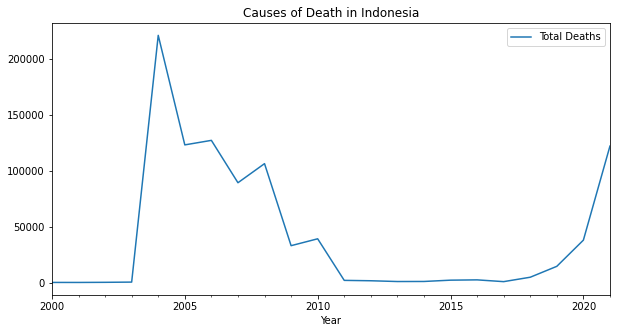

In [ ]:
# Visualisasi attribute yang digunakan
uas.plot(figsize=(10,5), legend=True, title='Causes of Death in Indonesia')

## Membuat Data Training dan Data Testing

In [ ]:
print(uas.shape)
train = uas.iloc[:-13]
test = uas.iloc[-13:]
print(train.shape, test.shape)

(22, 1)
(9, 1) (13, 1)


In [ ]:
train

,Total Deaths
Year,
2000-01-01,339
2001-01-01,324
2002-01-01,435
2003-01-01,633
2004-01-01,220744
2005-01-01,123036
2006-01-01,127065
2007-01-01,89275
2008-01-01,106298


In [ ]:
test

,Total Deaths
Year,
2009-01-01,33124
2010-01-01,39261
2011-01-01,2173
2012-01-01,1834
2013-01-01,1145
2014-01-01,1199
2015-01-01,2356
2016-01-01,2624
2017-01-01,1044


## Proses Attribute

In [ ]:
# Melakukan prediksi terhadap data test
start = len(train)
end = len(train) + len(test)-3
print(start)
print(end)

9
19


Berdasarkan dari dataset yang telah di riset, terdapat sebuah permasalahan pada laporan kematian di Indonesia karena berberapa faktor. salah satunya sering terjadinya low update data kematian.  Dan juga terkadang laporan kasus kematian ada yang tidak akurat. Hal ini menyebabkan data laporan kasus harian kematian di Indonesia tidak dapat menggambarkan keadaan yang sebenarnya. Maka dari itu diperlukan sistem yang dapat memperbaiki jumlah aktual kasus harian kematian di Indonesia. Mungkin dengan kita membangun sebuah sistem Laporan kematian yang tepat dan akurat bisa jadi tidak hanya di Indonesia, bahkan kita bisa menerapkan data ini di tingkat Asia, atau bahkan di negara-negara eropa.